# Discrete Event Simulation of a Queue using Python



### Objective: Generate a Simulation model that outputs the performance measures, such as average length, average waiting time, utilization of the system, etc. to provide information for designing or improving service facilities.
##### Data:
- λ: the arrival rate (the expected number of consecutive arrivals per the same unit time, e.g. 1 minute)
- μ: the service rate (the expected number of consecutive service completions per the same unit time, e.g. 1 minute)
- the distribution of the data
- c: the number of servers = 1

In [43]:
#Importing Libraries
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)


In [102]:
#Single or multiple server queue simulation
l = 20 # average number of arrivals per minute
µ =40 # average number of people served per minute
ncust =24# number of customers
c=2 # number of servers
#empty dictionary for computing the utilization with each configuration of servers
utilization={}

 ### For this project the data will be generated using random number generation, in an actual study the rates should be modeled from real data to get more accurate results. 


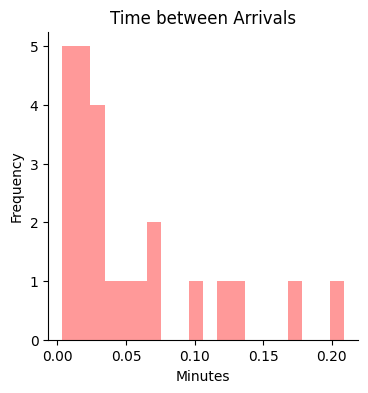

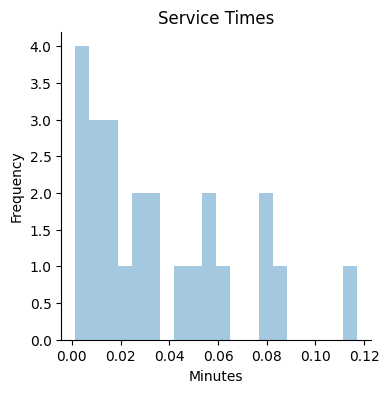

In [103]:
   #generating inter arrival times using exponential distribution
inter_arrival_times = list(np.random.exponential(scale=1/l,size=ncust))

    #plotting data
plt.figure(figsize=(4,4))
sns.distplot(inter_arrival_times,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

 # Generate random service times for each customer 
service_times = list(np.random.exponential(scale=1/µ,size=ncust))  

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(service_times,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()


In [71]:
arrival_times= []# list of arrival times of a person joining the queue
# service_times = [] # list of service times once they reach the front
finish_times = [] # list of finish times after waiting and being served
        
arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]
    
arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)
    

In [72]:

#Generating finish times
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)    
    
 # Total time spent in the system by each customer
total_times =[abs(round((finish_times[i]-arrival_times[i]),4)) for i in range(ncust)]
    
    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((total_times[i] - service_times[i]),4)) for i in range(ncust)]

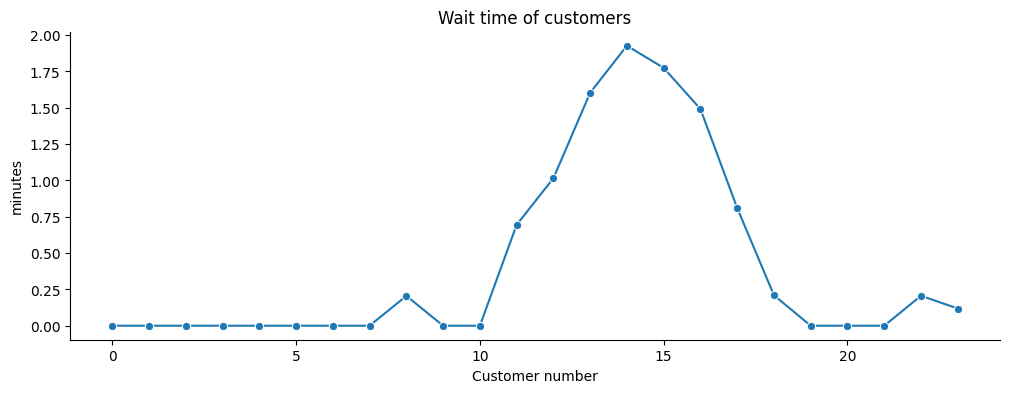

In [74]:
#plotting Wait times
plt.figure(figsize=(12,4))
sns.lineplot(x=range(ncust),y=wait_times,marker='o')
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers')
sns.despine()
plt.show()

In [83]:
  #creating a dataframe with all the data of the model

ls = [l for i in range(ncust)]
µs = [µ for i in range(ncust)]
cs = [c for i in range(ncust)]

data = pd.DataFrame(list(zip(ls,µs,cs,arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times)),
                columns =['lambda', 'mu','c','arrival_times','finish_times','service_times','total_times','wait_times','inter_arrival_times'])

#Printing the first 5 rows of the data
data
    

,lambda,mu,c,arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times
0,1,1.5,2,1.6688,2.9458,1.277020,1.2770,0.0000,1.668755
1,1,1.5,2,2.3152,2.6026,0.287396,0.2874,0.0000,0.646424
2,1,1.5,2,3.0558,3.2638,0.207973,0.2080,0.0000,0.740566
3,1,1.5,2,3.3442,3.3868,0.042591,0.0426,0.0000,0.288376
4,1,1.5,2,4.2732,5.4212,1.148044,1.1480,0.0000,0.928978
5,1,1.5,2,4.6340,4.9523,0.318332,0.3183,0.0000,0.360833
6,1,1.5,2,5.4951,6.0602,0.565054,0.5651,0.0000,0.861055
7,1,1.5,2,5.6810,8.4195,2.738506,2.7385,0.0000,0.185942
8,1,1.5,2,5.8547,6.0613,0.001064,0.2066,0.2055,0.173722
9,1,1.5,2,6.3943,6.4991,0.104787,0.1048,0.0000,0.539619


In [122]:
def sim(l, mu, c, ncust=24):
    inter_arrival_times = list(np.random.exponential(scale=1/l,size=ncust))
    service_times = list(np.random.exponential(scale=1/mu,size=ncust))  
    return  inter_arrival_times, service_times, c

    

# get the config that has the structure like config[lambda][mu][c]["mean"] = [inter_arriaval_times]
l_name = {1: "0", 2: "20", 3:"40", 4:"60", 5:"80"}
mu_name = {1: "0", 2: "20", 3:"40", 4:"60", 5:"80"}
control_name = {1: "2g", 2: "3g"}

config = {}
for l in range(1, 6):
    config[l_name[l]] = {}
    for mu in range(1, 6):
        config[l_name[l]][mu_name[mu]] = {}
        for c in range(1, 3):
            config[l_name[l]][mu_name[mu]][control_name[c]] = {}
            config[l_name[l]][mu_name[mu]][control_name[c]]["mean"] = []
            for i in range(100):
                inter_arrival_times, service_times, c = sim(l*20, mu*20, c)
                config[l_name[l]][mu_name[mu]][control_name[c]]["mean"] = inter_arrival_times

# dump the config to a json file
import json
with open("config.json", "w") as f:
    json.dump(config, f, indent=4)


In [120]:
config["0"]["0"]["2g"]["mean"]

[0.04445380417942556,
 0.01652776083296091,
 0.0023933762854604045,
 0.017530230746141923,
 0.11722572986183799,
 0.004346178327090734,
 0.0018651278797081749,
 0.0029372304470466036,
 0.013294670755334255,
 0.057256497571013844,
 0.005591544812209299,
 0.00717436568082506,
 0.1374917157130721,
 0.12163388787409046,
 0.0020993899659448273,
 0.01719487269936821,
 0.0029463105903544747,
 0.020170448982951082,
 0.017721155062470195,
 0.12769938099983336,
 0.06887661572824644,
 0.0042687823370655366,
 0.008428267671117052,
 0.049445051460427075]

In [107]:
tbe=list([0])
timeline=['simulation starts']
for i in range(0,ncust):
    tbe.append(data['arrival_times'][i])
    tbe.append(data['finish_times'][i])
    timeline.append('customer ' +str(i+1)+' arrived')
    timeline.append('customer ' +str(i+1)+' left')
        
    
#generating a dataframe with the timeline and description of events
    
timeline = pd.DataFrame(list(zip(tbe,timeline)), 
                columns =['time','Timeline']).sort_values(by='time').reset_index()
timeline=timeline.drop(columns='index')

#printing the first 5 rows of the data
timeline
    

,time,Timeline
0,0.0000,simulation starts
1,1.6688,customer 1 arrived
2,2.3152,customer 2 arrived
3,2.6026,customer 2 left
4,2.9458,customer 1 left
5,3.0558,customer 3 arrived
6,3.2638,customer 3 left
7,3.3442,customer 4 arrived
8,3.3868,customer 4 left
9,4.2732,customer 5 arrived


In [85]:
#generating the number of customers inside the system at any given time of the simulation
    
timeline['n']=0
x=0
for i in range(1,(2*ncust)-1):
    if len(((timeline.Timeline[i]).split()))>2:
        z=str(timeline['Timeline'][i]).split()[2]
    else:
        continue
    if z =='arrived':
        x = x+1
        timeline['n'][i]=x
    else:
        x=x-1
        if x==-1:
            x=0
        timeline['n'][i]=x

In [86]:
#computing time between events
t= list()
for i in timeline.index:
    if i == (2*ncust) -2 :
        continue
    if i < 2*ncust:
        x=timeline.time[i+1]
    else:
        x=timeline.time[i]
    y=timeline.time[i]
    t.append(round((x-y),4))

t.append(0) 
timeline['tbe']=t

In [87]:
#show results
timeline.head()

,time,Timeline,n,tbe
0,0.0000,simulation starts,0,1.6688
1,1.6688,customer 1 arrived,1,0.6464
2,2.3152,customer 2 arrived,2,0.2874
3,2.6026,customer 2 left,1,0.3432
4,2.9458,customer 1 left,0,0.1100


In [88]:
  #computing the probability and time spent of 'n' customers in the system
    
Pn=timeline.groupby('n').tbe.agg(sum)/sum(t)
Tn=timeline.groupby('n').tbe.agg('count')
timeline.groupby('n').tbe.agg(sum)/sum(t)

n
0    0.242231
1    0.284240
2    0.212056
3    0.089142
4    0.038732
5    0.025639
6    0.095339
7    0.012621
Name: tbe, dtype: float64

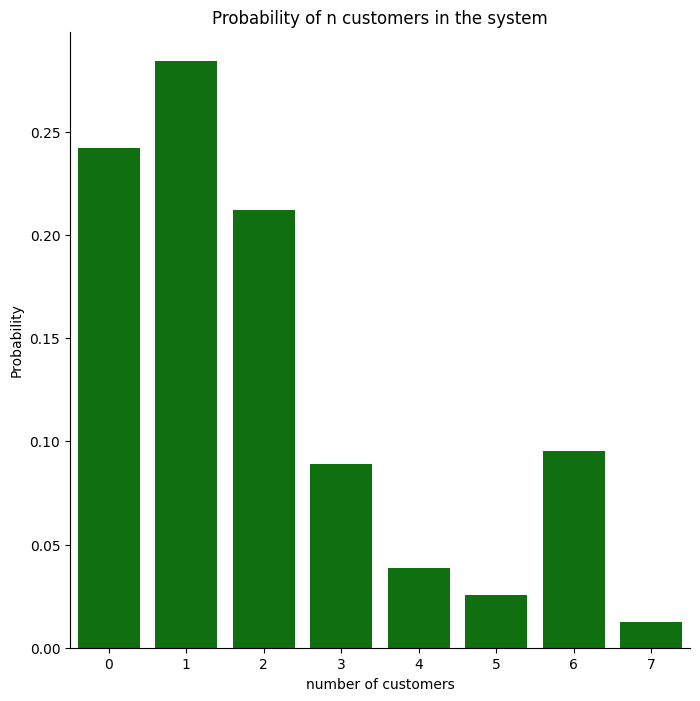

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 700x700 with 0 Axes>

In [89]:
#plotting results
plt.figure(figsize=(8,8))
sns.barplot(x=Pn.index,y=Pn,color='g')
plt.title('Probability of n customers in the system')
plt.xlabel('number of customers')
plt.ylabel('Probability')
sns.despine()
plt.show()

plt.figure(figsize=(7,7))
sns.barplot(['Idle','Occupied'],[Pn[0],1-Pn[0]],color='mediumpurple')
plt.title('Utilization %')
plt.xlabel('System state')
plt.ylabel('Probability')
sns.despine()
plt.show()

In [90]:

    #computing expected number of customers in the system
Ls=(sum(Pn*Pn.index))
        
    #computing expected customers waiting in line
Lq=sum((Pn.index[c+1:]-1)*(Pn[c+1:]))
    

In [91]:
# Model Results
print('Output:','\n',
     'Servers : '+str(c),'\n '
     'Time Between Arrivals : ',str(data.inter_arrival_times.mean()),'\n',
     'Service Time: (1/µ)',str(data.service_times.mean()),'\n'
     ' Utilization (c): ',str((Ls-Lq)/c),'\n',
     'Expected wait time in line (Wq):',str(data['wait_times'].mean()),'\n',
     'Expected time spent on the system (Ws):',str(data.total_times.mean()),'\n',
     'Expected number of customers in line (Lq):',str(Lq),'\n',
     'Expected number of clients in the system (Ls):',str(Ls),'\n '
     'Expected number of occupied servers :',str(Ls-Lq),'\n')

Output: 
 Servers : 2 
 Time Between Arrivals :  0.5916485644686738 
 Service Time: (1/µ) 0.7563062476168202 
 Utilization (c):  0.484912746352175 
 Expected wait time in line (Wq): 0.41905 
 Expected time spent on the system (Ws): 1.1753625 
 Expected number of customers in line (Lq): 0.9494606075945905 
 Expected number of clients in the system (Ls): 1.9192861002989405 
 Expected number of occupied servers : 0.96982549270435 

